## Доклад №1: *"Специализированные типы данных в Python (модуль collections и его аналоги)"*

### Лысенко Леонид B82

> ### **Ведение**

В Python существует богатый набор стандартных типов данных, которые покрывают большинство задач программирования:

> **Простые типы** (int, float, bool, str) — для работы с числами, логическими значениями и строками.
>
> **Коллекции** (list, tuple, set, dict) — для хранения и обработки наборов данных.

Однако иногда стандартных типов недостаточно: например, когда нужны более эффективные структуры данных для специфических задач (задача подсчёта значений, организациz сбора и быстрой конвертации данных из файлов CSV и баз SQL).
>
Здесь на помощь приходит модуль **collections**! Он содержит мощные, удобные и быстродействующие альтернативы встроенным типам данных: словарям, спискам, кортежам.

Ссылка на документацию:

https://docs.python.org/3/library/collections.html

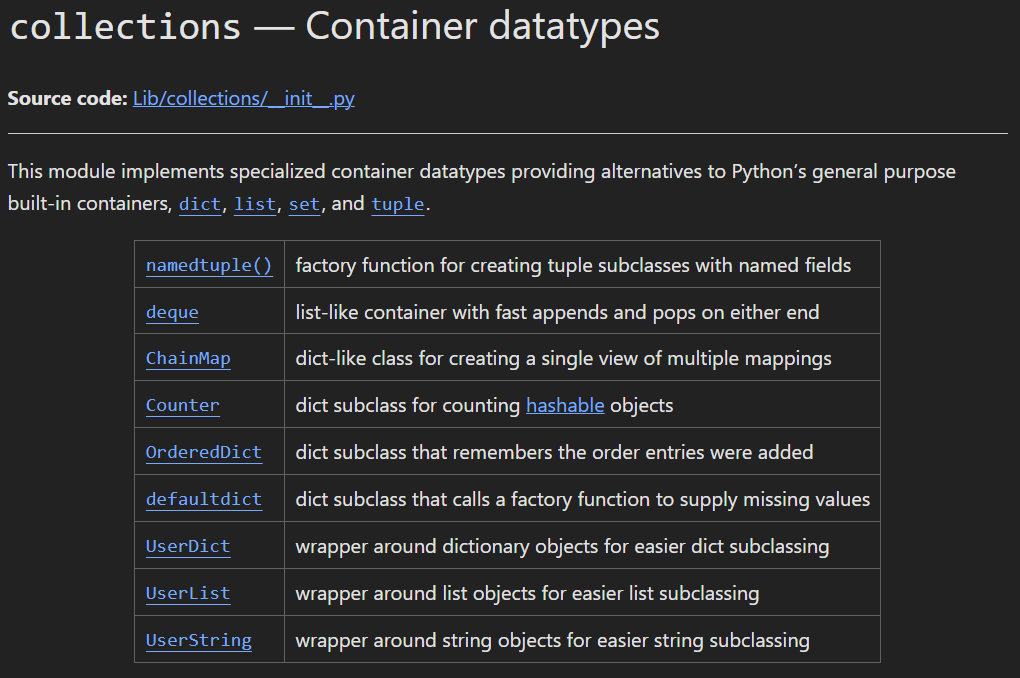

Рассмотрим представленные в модуле **collections** типы в порядке, указанном в документации

> ### **ChainMap**

Класс **ChainMap()** предназначен для быстрого объединения нескольких словарей, чтобы их можно было рассматривать как единое целое. Такой контейнер объединяет словари и ищет ключи намного быстрее, чем создание нового словаря и выполнение объединения при помощи вызовов dict.update().

In [1]:
from collections import ChainMap

In [2]:
first = {'two': 22, 'three': 3}
last = {'one': 1, 'two': 2}
d = ChainMap(first, last)

In [3]:
print(first, last, sep='\n')

{'two': 22, 'three': 3}
{'one': 1, 'two': 2}


In [4]:
d

ChainMap({'two': 22, 'three': 3}, {'one': 1, 'two': 2})

In [5]:
d['two']

22

При добавлении словарей, одинаковые ключи не затираются новыми значениями, вместо этого словари добавляются и хранятся в обновляемом списке. Доступ к этому списку можно получить используя атрибут d.maps.

In [6]:
d.maps

[{'two': 22, 'three': 3}, {'one': 1, 'two': 2}]

Класс поддерживает все основные методы словарей dict(). Операции добавления, обновления и удаления значений могут быть произведены только со словарем, который был добавлен первым.

In [7]:
d['four'] = 4
d

ChainMap({'two': 22, 'three': 3, 'four': 4}, {'one': 1, 'two': 2})

In [8]:
d.popitem()

('four', 4)

In [9]:
d

ChainMap({'two': 22, 'three': 3}, {'one': 1, 'two': 2})

In [10]:
# попробуем изменить первый элемент второго словаря
d['one'] = 11
d

ChainMap({'two': 22, 'three': 3, 'one': 11}, {'one': 1, 'two': 2})

In [11]:
# все изменения происходят только с первым словарем

In [12]:
# смотрим исходный словарь
first

{'two': 22, 'three': 3, 'one': 11}

In [13]:
last

{'one': 1, 'two': 2}

In [ ]:
d.f

In [14]:
del first['two']

In [15]:
last['four'] = 4

In [16]:
d

ChainMap({'three': 3, 'one': 11}, {'one': 1, 'two': 2, 'four': 4})

Поиск ключей в ChainMap() происходит последовательно, слева на право, во всех добавленных словарях, пока не будет найден соответствующий ключ.

In [ ]:
d['one']

11

In [ ]:
d['two']

2

Порядок итераций ChainMap() происходит в обратном порядке от последнего добавленного словаря к первому:

In [ ]:
list(d)

['one', 'two', 'four', 'three']

Атрибут **ChainMap.maps** представляет собой обновляемый пользователем список словарей dict() и должен всегда содержать хотя бы один словарь. Список словарей ChainMap.maps упорядочен в порядке их добавления для последовательного поиска по ключам от первого до последнего.

In [ ]:
d.maps

[{'three': 3, 'one': 11}, {'one': 1, 'two': 2, 'four': 4}]

Атрибут **ChainMap.maps** поддерживает все основные операции со списками, следовательно можно добавлять новые словари и удалять уже добавленные, а так же изменять их последовательность.

___

Метод **ChainMap.new_child()** возвращает новый экземпляр класса ChainMap(), содержащий новый словарь **m**, за которым следуют все словари в текущем экземпляре.

Если указан словарь **m**, то он вставляется первым в списке существующих словарей текущего экземпляра.

In [ ]:
another_dict = {'five': 5, 'six': 6}
d_child = d.new_child(m=another_dict)
d_child

ChainMap({'five': 5, 'six': 6}, {'three': 3, 'one': 11}, {'one': 1, 'two': 2, 'four': 4})

In [ ]:
d_child = d.new_child()
d_child

ChainMap({}, {'three': 3, 'one': 11}, {'one': 1, 'two': 2, 'four': 4})

___

Атрибут **ChainMap.parents** возвращает новый экземпляр класса ChainMap(), содержащий все словари в текущем экземпляре, кроме первого. Это полезно для пропуска первого словаря при поиске ключей.

In [ ]:
d_child.parents

ChainMap({'three': 3, 'one': 11}, {'one': 1, 'two': 2, 'four': 4})

In [ ]:
d

ChainMap({'three': 3, 'one': 11}, {'one': 1, 'two': 2, 'four': 4})

In [ ]:
d.parents

ChainMap({'one': 1, 'two': 2, 'four': 4})

> ### **Counter**

Класс **collections.Counter()** предназначен для удобных и быстрых подсчетов количества появлений неизменяемых элементов в последовательностях.

In [ ]:
from collections import Counter

In [ ]:
cnt = Counter(['red', 'blue', 'red', 'green', 'blue', 'blue'])
cnt

Counter({'blue': 3, 'red': 2, 'green': 1})

Класс **Counter()** модуля collections - это подкласс словаря dict для подсчета хеш-объектов (неизменяемых, таких как строки, числа, кортежи и т.д.). Это коллекция, в которой элементы хранятся в виде словарных ключей, а их счетчики хранятся в виде значений словаря.

In [ ]:
# новый пустой счетчик
cnt = Counter()
cnt

Counter()

In [ ]:
# новый счетчик из последовательности
cnt = Counter('coffee')
cnt

Counter({'f': 2, 'e': 2, 'c': 1, 'o': 1})

In [ ]:
# новый счетчик из словаря
cnt = Counter({'red': 4, 'blue': 2})
cnt

Counter({'red': 4, 'blue': 2})

Счетчики **collections.Counter()** имеют интерфейс словаря, за исключением того, что они возвращают 0 для отсутствующих элементов вместо вызова исключения KeyError:

In [ ]:
cnt = Counter(['one', 'two', 'two'])

print(cnt['two'], cnt['one'], cnt['zero'], sep='\n')

2
1
0


Установка счетчика в ноль не удаляет элементы из счетчика. Используем инструкцию del, чтобы полностью удалить ключ счетчика:

In [ ]:
# запись счетчика с нулевым счетом
cnt['one'] = 0
cnt

Counter({'two': 2, 'one': 0})

In [ ]:
# удаление счетчика с нулевым счетом
del cnt['one']
cnt

Counter({'two': 2})

Метод **Counter.elements()** возвращает итератор по элементам, в котором каждый элемент повторяется столько раз, во сколько установлено его значение. Элементы возвращаются в порядке их появления. Если количество элементов меньше единицы, то метод Counter.elements() просто проигнорирует его.

In [ ]:
cnt = Counter(a=4, b=2, c=0, d=-2)
cnt

Counter({'a': 4, 'b': 2, 'c': 0, 'd': -2})

In [ ]:
list(cnt.elements())

['a', 'a', 'a', 'a', 'b', 'b']

---

Метод **Counter.most_common()** возвращает список из **n** наиболее распространенных элементов и их количество от наиболее распространенных до наименее. Если **n** опущено или **None**, метод **cnt.most_common()** возвращает все элементы в счетчике.

In [ ]:
Counter('abracadabra').most_common(3)

[('a', 5), ('b', 2), ('r', 2)]

---

Метод **Counter.subtract()** вычитает элементы текущего счетчика **cnt** и итерируемой последовательности или другого словаря или другого счетчика **Counter()**. Подобно методу словаря **dict.update()**, но вычитает количество (значения ключей), а не заменяет их.

In [ ]:
c = Counter(a=5, b=10, c=-5)
d = Counter(c=-2, b=10, a=0)

c.subtract(d)
c

Counter({'a': 5, 'b': 0, 'c': -3})

---

Метод **Counter.total()** вычисляет сумму значений текущего счетчика.

In [ ]:
Counter(a=5, b=2, c=0).total()

7

In [ ]:
sum(Counter(a=5, b=2, c=0).values())

7

---

Метод **Counter.update()** складывает элементы текущего счетчика cnt и итерируемой последовательности или другого словаря или другого счетчика **Counter()**. Работает подобно методу словаря **dict.update()**, но складывает количество (значения ключей), а не заменяет их.

In [ ]:
c = Counter(a=5, b=10, c=-5)
d = Counter(c=-2, b=10, a=0)

c.update(d)
c

Counter({'b': 20, 'a': 5, 'c': -7})

> ### **Deque**

Класс **collections.deque()** это обобщение стеков и очередей и представляет собой двустороннюю очередь. Двусторонняя очередь **deque()** поддерживает поточно-ориентированные, эффективные по памяти операции добавления и извлечения элементов последовательности с любой стороны с примерно одинаковой производительностью **O(1)** в любом направлении.

In [ ]:
from collections import deque

In [ ]:
dq = deque(iterable='abcd', maxlen=3)
dq

deque(['b', 'c', 'd'], maxlen=3)

Если аргумент **maxlen** не указан или равен **None**, количество хранимых записей в объекте **deque()** может увеличиваться до произвольной длины. В противном случае, объект **deque()** ограничивает количество хранимых элементов в своем контейнере максимальной длиной **maxlen**.
>
При добавлении новых элементов, когда заполнение очереди **deque()** становится больше значения **maxlen**, избыточное количество элементов удаляется/сбрасывается с противоположного конца.

Метод **Deque.append()** добавляет _**element**_ к правой стороне (в конец) контейнера **deque()**.

In [ ]:
dq = deque('abcd', maxlen=None)

dq.append('e')
dq

deque(['a', 'b', 'c', 'd', 'e'])

---

Метод **Deque.appendleft()** добавляет _**element**_ к левой стороне (в начало) контейнера **deque()**.

In [ ]:
dq.appendleft('f')
dq

deque(['f', 'a', 'b', 'c', 'd', 'e'])

---

Метод **Deque.copy()** создает мелкую копию контейнера **deque()**.


In [ ]:
cp_dq = dq.copy()
cp_dq

deque(['f', 'a', 'b', 'c', 'd', 'e'])

---

Метод **Deque.clear()** удаляет все элементы из контейнера **deque()**, оставляя его длиной 0.

In [ ]:
cp_dq.clear()

print(cp_dq, dq, sep='\n')

deque([])
deque(['f', 'a', 'b', 'c', 'd', 'e'])


---

Метод **Deque.count()** подсчитывает количество элементов контейнера **deque()**, равное значению _**element**_.

In [ ]:
dq = deque('Russia')
dq.count('s')

2

---

Метод **Deque.extend()** расширяет правую сторону (с конца) контейнера **deque()**, добавляя элементы из итерируемого аргумента **iterable**.

In [ ]:
dq.extend('power')
dq

deque(['R', 'u', 's', 's', 'i', 'a', 'p', 'o', 'w', 'e', 'r'])

---

Метод **Deque.extendleft()** расширяет левую сторону (с начала) контейнера **deque()**, добавляя элементы из итерируемого аргумента **iterable**.

In [ ]:
dq = deque('abc')

dq.extendleft('klm')
dq

deque(['m', 'l', 'k', 'a', 'b', 'c'])

---

Метод **Deque.index()** возвращает позицию (индекс) первого совпадения значения аргумента _**element**_ в контейнере **deque()**, расположенного после необязательного аргумента **start** и до необязательного аргумента **stop**.
>
Вызывает исключение **ValueError**, если значения аргумента _**element**_ не найдено.

In [ ]:
dq = deque('bgcdefghijj')

dq.index('g', 3)

6

In [ ]:
dq.index('b', 3)

ValueError: 'b' is not in deque

---

Метод **Deque.insert()** вставляет значение аргумента _**element**_ в позицию **i** контейнера **deque()**.

In [ ]:
dq.insert(2, 'lol')
dq

deque(['a', 'b', 'lol', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'j'])

---

Метод **Deque.pop()** удаляет и возвращает элемент с правой стороны (с конца) контейнера **deque()**. Если элементы отсутствуют, возникает ошибка **IndexError**.

In [ ]:
dq.pop()

'j'

Метод **Deque.popleft()** удаляет и возвращает элемент с левой стороны (с начала) контейнера **deque()**. Если элементы отсутствуют, возникает ошибка **IndexError**.

---

In [ ]:
dq.popleft()

'a'

---

Метод **Deque.remove()** удаляет первое вхождение значения **value** в контейнер **deque()**. Если значение **value** не найдено, возникает ошибка **IndexError**.

In [ ]:

dq.remove('b')
dq

deque(['lol', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

---

Метод **Deque.reverse()** разворачивает элементы контейнера **deque()** на месте и возвращает **None**.

In [ ]:
dq.reverse()
dq

deque(['j', 'i', 'h', 'g', 'f', 'e', 'd', 'c', 'b', 'lol'])

---

Метод **Deque.rotate()** разворачивает контейнер **deque()** на **n** шагов вправо. Если аргумент **n** имеет отрицательное значение, то разворачивает контейнер налево.

In [ ]:
dq.rotate(2)
dq

deque(['b', 'lol', 'j', 'i', 'h', 'g', 'f', 'e', 'd', 'c'])

> ### **defaultdict**

Класс **defaultdict()** модуля **collections** ничем не отличается от обычного словаря за исключением того, что по умолчанию всегда вызывается функция, которая возвращает значение по умолчанию для новых значений. Другими словами Класс **defaultdict()** представляет собой словарь со значениями по умолчанию.

Первый аргумент предоставляет начальное значение для атрибута **default_factory**. По умолчанию **None**. Все остальные аргументы обрабатываются так же, как если бы они были переданы конструктору **dict()**.

Класс **defaultdict()** возвращает новый словарь-подобный объект. **Defaultdict** является подклассом встроенного класса **dict()**. Он переопределяет один метод и добавляет одну доступную для записи переменную экземпляра. Остальная функциональность такая же, как и для класса **dict()**.

In [ ]:
from collections import defaultdict

In [ ]:
dd = defaultdict(int, {'one': 1, 'two': 2})
dd

defaultdict(int, {'one': 1, 'two': 2})

In [ ]:
dd['three']

0

In [ ]:
dd

defaultdict(int, {'one': 1, 'two': 2, 'three': 0})

In [ ]:
# Пользовательская функция как default_factory
def default_value():
    return "default_value"

dd = defaultdict(default_value)
dd

defaultdict(<function __main__.default_value()>, {})

In [ ]:
dd['new_key']

'default_value'

In [ ]:
dd

defaultdict(<function __main__.default_value()>, {'new_key': 'default_value'})

Если параметр **default_factory** в **defaultdict** равен **None**, то **defaultdict** ведёт себя точно так же, как обычный словарь **dict**.

In [ ]:
dd = defaultdict()
dd

defaultdict(None, {})

In [ ]:
dd['one']

KeyError: 'one'

> ### **namedtuple**

Именованные кортежи присваивают имя каждому значению элемента в кортеже и тем самым создают более читаемый код.

In [ ]:
from collections import namedtuple

In [ ]:
Point = namedtuple('Point', ['x', 'y']) # 'Point' — это название нового типа данных, который будет создан с помощью namedtuple.

In [ ]:
Point

__main__.Point

In [ ]:
# создаем с позиционным или именованным параметром
p = Point(11, y=22)
p

Point(x=11, y=22)

In [ ]:
# обращаемся по индексу как к обычному кортежу
print(p[0])
print(p[1])

11
22


In [ ]:
p[0] + p[1]

33

In [ ]:
# Доступ по имени поля
print(p.x)
print(p.y)

11
22


In [ ]:
# распаковываем как обычный кортеж
x, y = p

print(x)
print(y)

11
22


In [ ]:
# поля также доступны по названию
p.x + p.y

33

Метод **NamedTuple._make()** создает новый экземпляр класса **namedtuple()** из существующей последовательности или итерации **iterable**.

In [ ]:
coord = [10, 20]
Point._make(coord)

Point(x=10, y=20)

---

Метод **NamedTuple._asdict()** вернет новый словарь **dict**, который отображает имена полей в соответствии с их значениями:

In [ ]:
p = Point(x=10, y=20)
p._asdict()

{'x': 10, 'y': 20}

---

Метод **NamedTuple._replace()** вернет новый экземпляр именованного кортежа, заменив указанные поля новыми значениями:

In [ ]:
p = Point(x=10, y=20)
p._replace(x=30, y=40)

Point(x=30, y=40)

---

Свойство **NamedTuple._fields** вернет кортеж строк, перечисляющий имена полей.

In [ ]:
p = Point(x=10, y=20)

# просмотр имен полей
p._fields

('x', 'y')

---

Свойство **NamedTuple._field_defaults** вернет словарь, который сопоставляет имена полей со значениями по умолчанию.

Значения аргумента **defaults** могут быть None или итерируемой последовательностью. Поскольку аргумента со значением по умолчанию должны идти после любых обязательных аргументов, то значения по умолчанию будут применяются к самым правым параметрам.
>
Например, если имена полей именованного кортежа это ['x', 'y', 'z'], а значения по умолчанию (1, 2), то тогда x будет обязательным аргументом, y по умолчанию будет 1, а z будет 2.

In [ ]:
Account = namedtuple('Account', ['type', 'balance'], defaults=[0])

Account._field_defaults

{'balance': 0}

In [ ]:
Account('premium')

Account(type='premium', balance=0)

> ### **OrderedDict**

Класс **OrderedDict()** модуля **collections** возвращает экземпляр подкласса **dict**, у которого есть методы, специализированные для изменения порядка словаря.

Метод **od.popitem()** для упорядоченных словарей возвращает и удаляет пару **(key, value)**. Пары **(key, value)** возвращаются в порядке **LIFO**, если аргумент **last=True** или в порядке **FIFO**, если **last=False**.

In [ ]:
from collections import OrderedDict

In [ ]:
od = OrderedDict()
od['a'] = 1
od['b'] = 2
od['c'] = 3

od

OrderedDict([('a', 1), ('b', 2), ('c', 3)])

In [ ]:
od.popitem(False)

('a', 1)

In [ ]:
od

OrderedDict([('b', 2), ('c', 3)])

---

Метод **od.move_to_end()** перемещает существующий ключ **key** в начало/конец упорядоченного словаря. Элемент перемещается в правый конец, если аргумент **last=True** (по умолчанию), или в начало, если **last=False**. Вызывает исключение **KeyError**, если ключ не существует:

In [ ]:
od = OrderedDict(zip('abc', [1, 2, 3]))
od

OrderedDict([('a', 1), ('b', 2), ('c', 3)])

In [ ]:
od.move_to_end('b', True)
od

OrderedDict([('a', 1), ('c', 3), ('b', 2)])

---

Проверка на равенство:

In [ ]:
od1 = OrderedDict([('a', 1), ('b', 2)])
od2 = OrderedDict([('b', 2), ('a', 1)])

od1 == od2 # Здесь od1 и od2 содержат одни и те же пары "ключ-значение", но в разном порядке.

False

In [ ]:
od = OrderedDict([('a', 1), ('b', 2)])
regular_dict = {'b': 2, 'a': 1}

od == regular_dict # Поскольку сравнение с обычным словарём нечувствительно к порядку, od и regular_dict считаются равными.

True

> ### **UserDict**, **UserList**, **UserString**

Класс **UserDict()** модуля **collections** это удобная обертка для обычного объекта **dict**. Этот класс обеспечивает то же поведение, что и встроенный тип **dict**, с дополнительной возможностью предоставления доступа к базовому словарю через атрибут экземпляра **UserDict.data**.

https://docs-python.ru/standart-library/modul-collections-python/klass-userdict/

Класс **UserList()** модуля **collections** действует как обертка для объектов списка **list**. Это полезный базовый класс для собственных классов, подобных спискам, которые могут наследоваться от них и переопределять существующие методы или добавлять новые. Таким образом, в списки можно добавлять новые модели поведения.

https://docs-python.ru/standart-library/modul-collections-python/klass-userlist/

Класс **UserString()** модуля **collections** имитирует строковый объект. Содержимое экземпляра хранится в обычном строковом объекте, который доступен через атрибут экземпляра **UserString.data**. Содержимое экземпляра изначально устанавливается на копию **seq**. Аргументом **seq** может быть любой объект, который можно преобразовать в строку с помощью встроенной функции **str()**.

https://docs-python.ru/standart-library/modul-collections-python/klass-userstring/

> ## **Возможные аналоги**

> ### **NumPy**

**numpy.ndarray** — это основной тип данных в библиотеке **NumPy**, представляющий собой N-мерный массив (многомерный контейнер) для хранения элементов одного типа. Аналог списков, но с поддержкой многомерных операций и векторных вычислений.

In [ ]:
import numpy as np
data = np.array([(1, 2.0), (3, 4.0)], dtype=[('x', 'i4'), ('y', 'f4')])
data

array([(1, 2.), (3, 4.)], dtype=[('x', '<i4'), ('y', '<f4')])

In [ ]:
data['x']

array([1, 3], dtype=int32)

In [ ]:
data['y']

array([2., 4.], dtype=float32)

> ### **Pandas**

**Series** — это одномерный массив (или одномерная структура данных) в библиотеке **pandas**, который может хранить данные любого типа (числа, строки, объекты Python и т.д.).

In [ ]:
import pandas as pd
ser = pd.Series(data=[1, 2, 3], index=['a', 'b', 'c'])
ser

a    1
b    2
c    3
dtype: int64

> ### **heapq**

**Куча (heap)** — это специализированная структура данных, которая реализует очередь с приоритетом. Она позволяет эффективно извлекать элемент с наивысшим (или наименьшим) приоритетом. По сути кучи — это двоичные деревья, для которых каждый родительский узел имеет значение, меньшее или равное любому из его дочерних элементов.

In [ ]:
import heapq as hpq

# Создаём пустой список, который будет использоваться как куча
heap = []

# Добавляем элементы в кучу
hpq.heappush(heap, 5)
hpq.heappush(heap, 3)
hpq.heappush(heap, 7)
hpq.heappush(heap, 1)

heap

[1, 3, 7, 5]

In [ ]:
# Извлекаем элемент с наименьшим приоритетом
min_element = hpq.heappop(heap)

print(min_element)
print(heap)

1
[3, 5, 7]


In [ ]:
# Создаём обычный список
numbers = [9, 4, 6, 1, 3]

# Преобразуем его в кучу
hpq.heapify(numbers)

numbers

[1, 3, 6, 4, 9]

> ### **array** 

Модуль **array** в **Python** предоставляет эффективный способ хранения однотипных данных (например, только целых чисел или чисел с плавающей точкой) в компактном виде. Это аналог списков **(list)**, но более экономичный по памяти и быстрый для числовых операций.

In [ ]:
import array as arr

# Создаём массив чисел с плавающей точкой (тип 'f' — float, 4 байта)
float_arr = arr.array('f', [1.5, 2.5, 3.5])
float_arr

array('f', [1.5, 2.5, 3.5])

In [ ]:
print(float_arr[0])
print(float_arr[-1])

1.5
3.5


Ссылка для более подробного изучения модуля **collections**:
https://docs-python.ru/standart-library/modul-collections-python/